In [98]:
import pycaret
import pandas as pd

In [99]:
# ‡∏≠‡πà‡∏≤‡∏ô‡πÑ‡∏ü‡∏•‡πå CSV
data = pd.read_csv('../export_data/filtered_data_3_best.csv')

In [100]:
# ‡∏ï‡∏±‡πâ‡∏á 'timestamp' ‡πÄ‡∏õ‡πá‡∏ô index ‡∏´‡∏≤‡∏Å‡∏¢‡∏±‡∏á‡πÑ‡∏°‡πà‡πÑ‡∏î‡πâ‡∏ó‡∏≥
data['timestamp'] = pd.to_datetime(data['timestamp'])
data.set_index('timestamp', inplace=True)

# ‡∏ï‡∏±‡πâ‡∏á‡∏Ñ‡πà‡∏≤ freq ‡πÉ‡∏´‡πâ‡∏Å‡∏±‡∏ö index
data = data.asfreq('D')  # 'D' ‡∏™‡∏≥‡∏´‡∏£‡∏±‡∏ö‡∏£‡∏≤‡∏¢‡∏ß‡∏±‡∏ô

In [101]:
data.tail()

humidity      pm_10     pm_2_5  pm_2_5_sp  temperature
timestamp                                                                   
2025-02-07 07:00:00  70.933952  34.743259  29.321219  26.166471    28.271927
2025-02-08 07:00:00  69.348548  30.654249  26.000000  22.380675    28.385596
2025-02-09 07:00:00  69.916384  28.971065  24.616898  20.976852    28.373742
2025-02-10 07:00:00  71.226336  30.652667  25.856981  22.374574    28.251201
2025-02-11 07:00:00  68.159624  32.532955  27.522727  24.120455    28.693799

In [102]:
# ‡πÅ‡∏™‡∏î‡∏á‡πÅ‡∏ñ‡∏ß‡∏ó‡∏µ‡πà‡∏°‡∏µ‡∏Ñ‡πà‡∏≤‡∏´‡∏≤‡∏¢‡πÑ‡∏õ‡∏Å‡πà‡∏≠‡∏ô‡πÄ‡∏ï‡∏¥‡∏°
print("‡πÅ‡∏ñ‡∏ß‡∏ó‡∏µ‡πà‡∏°‡∏µ‡∏Ñ‡πà‡∏≤‡∏´‡∏≤‡∏¢‡πÑ‡∏õ‡∏Å‡πà‡∏≠‡∏ô‡πÄ‡∏ï‡∏¥‡∏°:")
print(data[data.isnull().any(axis=1)])

# ‡πÄ‡∏ï‡∏¥‡∏°‡∏Ñ‡πà‡∏≤‡∏ó‡∏µ‡πà‡∏´‡∏≤‡∏¢‡πÑ‡∏õ‡∏î‡πâ‡∏ß‡∏¢‡∏Å‡∏≤‡∏£ interpolate ‡πÅ‡∏ö‡∏ö‡πÄ‡∏™‡πâ‡∏ô‡∏ï‡∏£‡∏á
data.interpolate(method='linear', inplace=True)

# ‡πÅ‡∏™‡∏î‡∏á‡πÅ‡∏ñ‡∏ß‡∏ó‡∏µ‡πà‡∏¢‡∏±‡∏á‡∏°‡∏µ‡∏Ñ‡πà‡∏≤ NaN ‡∏´‡∏•‡∏±‡∏á‡∏à‡∏≤‡∏Å‡πÄ‡∏ï‡∏¥‡∏° (‡∏ñ‡πâ‡∏≤‡∏°‡∏µ)
missing_rows_after = data[data.isnull().any(axis=1)]
if not missing_rows_after.empty:
    print("‡πÅ‡∏ñ‡∏ß‡∏ó‡∏µ‡πà‡∏¢‡∏±‡∏á‡∏°‡∏µ‡∏Ñ‡πà‡∏≤‡∏´‡∏≤‡∏¢‡πÑ‡∏õ‡∏´‡∏•‡∏±‡∏á‡πÄ‡∏ï‡∏¥‡∏°:")
    print(missing_rows_after)
else:
    print("‡πÑ‡∏°‡πà‡∏°‡∏µ‡∏Ñ‡πà‡∏≤‡∏´‡∏≤‡∏¢‡πÑ‡∏õ‡πÅ‡∏•‡πâ‡∏ß")


row = data.loc["2023-09-30 07:00:00"]
row

‡πÅ‡∏ñ‡∏ß‡∏ó‡∏µ‡πà‡∏°‡∏µ‡∏Ñ‡πà‡∏≤‡∏´‡∏≤‡∏¢‡πÑ‡∏õ‡∏Å‡πà‡∏≠‡∏ô‡πÄ‡∏ï‡∏¥‡∏°:
                     humidity  pm_10  pm_2_5  pm_2_5_sp  temperature
timestamp                                                           
2023-09-30 07:00:00       NaN    NaN     NaN        NaN          NaN
‡πÑ‡∏°‡πà‡∏°‡∏µ‡∏Ñ‡πà‡∏≤‡∏´‡∏≤‡∏¢‡πÑ‡∏õ‡πÅ‡∏•‡πâ‡∏ß


humidity       82.889367
pm_10          60.525519
pm_2_5         53.415241
pm_2_5_sp      69.527667
temperature    29.219760
Name: 2023-09-30 07:00:00, dtype: float64

In [103]:
data = data[['pm_2_5', 'humidity', 'temperature']]

In [104]:
data["year"] = data.index.year
data["month"] = data.index.month
data["day"] = data.index.day
data["day_of_week"] = data.index.dayofweek  # 0 = Monday, 6 = Sunday
data["week_of_year"] = data.index.isocalendar().week  # ‡∏Ñ‡πà‡∏≤‡∏à‡∏∞‡πÄ‡∏õ‡πá‡∏ô int64

In [105]:
# ‡∏™‡∏°‡∏°‡∏ï‡∏¥‡∏ß‡πà‡∏≤ data ‡∏°‡∏µ index ‡πÄ‡∏õ‡πá‡∏ô datetime ‡∏≠‡∏¢‡∏π‡πà‡πÅ‡∏•‡πâ‡∏ß
def assign_season(month):
    if month in [2, 3, 4]:  # ‡∏Å.‡∏û. - ‡πÄ‡∏°.‡∏¢.
        return "summer"        # ‡∏§‡∏î‡∏π‡∏£‡πâ‡∏≠‡∏ô
    elif month in [5, 6, 7]:  # ‡∏û.‡∏Ñ. - ‡∏Å.‡∏Ñ.
        return "early_rainy"   # ‡∏ï‡πâ‡∏ô‡∏§‡∏î‡∏π‡∏ù‡∏ô
    else:  # ‡∏™.‡∏Ñ. - ‡∏°.‡∏Ñ.
        return "late_rainy"    # ‡∏õ‡∏•‡∏≤‡∏¢‡∏§‡∏î‡∏π‡∏ù‡∏ô

season_mapping = {'summer': 0, 'early_rainy': 1, 'late_rainy': 2}
data["season"] = data.index.month.map(assign_season)
data['season'] = data['season'].map(season_mapping)

In [106]:
data['dew_point'] = data['temperature'] - ((100 - data['humidity']) / 5)

In [107]:
data["is_weekend"] = data.index.dayofweek.isin([5, 6]).astype(int)

In [108]:
# ‡∏≠‡∏±‡∏ï‡∏£‡∏≤‡∏™‡πà‡∏ß‡∏ô‡∏Ç‡∏≠‡∏á‡∏≠‡∏∏‡∏ì‡∏´‡∏†‡∏π‡∏°‡∏¥‡∏ï‡πà‡∏≠‡∏Ñ‡∏ß‡∏≤‡∏°‡∏ä‡∏∑‡πâ‡∏ô
data["temp_humidity_ratio"] = data["temperature"] / (data["humidity"] + 1)

In [109]:
# ‡∏î‡∏±‡∏ä‡∏ô‡∏µ‡∏Ñ‡∏ß‡∏≤‡∏°‡∏£‡πâ‡∏≠‡∏ô (Heat Index) ‡∏´‡∏£‡∏∑‡∏≠‡∏≠‡∏∏‡∏ì‡∏´‡∏†‡∏π‡∏°‡∏¥‡∏ó‡∏µ‡πà‡∏£‡∏±‡∏ö‡∏£‡∏π‡πâ
T = data["temperature"]
RH = data["humidity"]

data["heat_index"] = -42.379 + (2.04901523 * T) + (10.14333127 * RH) - (0.22475541 * T * RH) - \
                   (0.00683783 * T**2) - (0.05481717 * RH**2) + (0.00122874 * T**2 * RH) + \
                   (0.00085282 * T * RH**2) - (0.00000199 * T**2 * RH**2)

In [110]:
# ‡∏Ñ‡∏ß‡∏≤‡∏°‡∏ä‡∏∑‡πâ‡∏ô‡∏™‡∏±‡∏°‡∏û‡∏±‡∏ó‡∏ò‡πå‡πÄ‡∏ä‡∏¥‡∏á‡∏î‡∏±‡∏ä‡∏ô‡∏µ
data["rh_index"] = data["humidity"] ** 2 / (data["temperature"] + 1)

In [111]:
import pandas as pd
import numpy as np

# ‡∏™‡∏°‡∏°‡∏∏‡∏ï‡∏¥‡∏ß‡πà‡∏≤‡∏°‡∏µ DataFrame data ‡∏ó‡∏µ‡πà‡∏°‡∏µ‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡∏≠‡∏¢‡∏π‡πà‡πÅ‡∏•‡πâ‡∏ß
# ‡πÄ‡∏û‡∏¥‡πà‡∏°‡∏ü‡∏µ‡πÄ‡∏à‡∏≠‡∏£‡πå day_of_year
data['date'] = pd.to_datetime(data[['year', 'month', 'day']])
data['day_of_year'] = data['date'].dt.dayofyear

# ‡πÄ‡∏û‡∏¥‡πà‡∏°‡∏ü‡∏µ‡πÄ‡∏à‡∏≠‡∏£‡πå month_sin ‡πÅ‡∏•‡∏∞ month_cos
data['month_sin'] = np.sin(2 * np.pi * data['month'] / 12)
data['month_cos'] = np.cos(2 * np.pi * data['month'] / 12)

# ‡πÄ‡∏û‡∏¥‡πà‡∏°‡∏ü‡∏µ‡πÄ‡∏à‡∏≠‡∏£‡πå day_of_week_sin ‡πÅ‡∏•‡∏∞ day_of_week_cos
data['day_of_week_sin'] = np.sin(2 * np.pi * data['day_of_week'] / 7)
data['day_of_week_cos'] = np.cos(2 * np.pi * data['day_of_week'] / 7)

# rolling_size = 1
# for i in range(2,rolling_size+1):
#     data[f'pm_2_5_rolling_{i}'] = data['pm_2_5'].rolling(window=i).mean().shift(1)

lag_size = 30
for i in range(1,lag_size+1):
    data[f'pm_2_5_lag_{i}'] = data['pm_2_5'].shift(i)

# data['humidity_rolling_2'] = data['humidity'].rolling(window=2).mean().shift(1)  # ‡∏Ñ‡πà‡∏≤‡πÄ‡∏â‡∏•‡∏µ‡πà‡∏¢ 2 ‡∏ß‡∏±‡∏ô‡∏Ç‡∏≠‡∏á PM 10
# data['humidity_rolling_5'] = data['humidity'].rolling(window=5).mean().shift(1)  # ‡∏Ñ‡πà‡∏≤‡πÄ‡∏â‡∏•‡∏µ‡πà‡∏¢ 5 ‡∏ß‡∏±‡∏ô‡∏Ç‡∏≠‡∏á PM 10
# data['humidity_rolling_7'] = data['humidity'].rolling(window=7).mean().shift(1)  # ‡∏Ñ‡πà‡∏≤‡πÄ‡∏â‡∏•‡∏µ‡πà‡∏¢ 7 ‡∏ß‡∏±‡∏ô‡∏Ç‡∏≠‡∏á PM 10

data['humidity_lag_1'] = data['humidity'].shift(1)
data['humidity_lag_2'] = data['humidity'].shift(2)
data['humidity_lag_3'] = data['humidity'].shift(3)
data['humidity_lag_7'] = data['humidity'].shift(7)

# data['temperature_rolling_2'] = data['temperature'].rolling(window=2).mean().shift(1)  # ‡∏Ñ‡πà‡∏≤‡πÄ‡∏â‡∏•‡∏µ‡πà‡∏¢ 2 ‡∏ß‡∏±‡∏ô‡∏Ç‡∏≠‡∏á PM 10
# data['temperature_rolling_5'] = data['temperature'].rolling(window=5).mean().shift(1)  # ‡∏Ñ‡πà‡∏≤‡πÄ‡∏â‡∏•‡∏µ‡πà‡∏¢ 5 ‡∏ß‡∏±‡∏ô‡∏Ç‡∏≠‡∏á PM 10
# data['temperature_rolling_7'] = data['temperature'].rolling(window=7).mean().shift(1)  # ‡∏Ñ‡πà‡∏≤‡πÄ‡∏â‡∏•‡∏µ‡πà‡∏¢ 7 ‡∏ß‡∏±‡∏ô‡∏Ç‡∏≠‡∏á PM 10

data['temperature_lag_1'] = data['temperature'].shift(1)
data['temperature_lag_2'] = data['temperature'].shift(2)
data['temperature_lag_3'] = data['temperature'].shift(3)
data['temperature_lag_7'] = data['temperature'].shift(7)

In [112]:
# data["temp_diff"] = data["temperature"].diff()
# data["humidity_diff"] = data["humidity"].diff()

In [113]:
data.columns

Index(['pm_2_5', 'humidity', 'temperature', 'year', 'month', 'day',
       'day_of_week', 'week_of_year', 'season', 'dew_point', 'is_weekend',
       'temp_humidity_ratio', 'heat_index', 'rh_index', 'date', 'day_of_year',
       'month_sin', 'month_cos', 'day_of_week_sin', 'day_of_week_cos',
       'pm_2_5_lag_1', 'pm_2_5_lag_2', 'pm_2_5_lag_3', 'pm_2_5_lag_4',
       'pm_2_5_lag_5', 'pm_2_5_lag_6', 'pm_2_5_lag_7', 'pm_2_5_lag_8',
       'pm_2_5_lag_9', 'pm_2_5_lag_10', 'pm_2_5_lag_11', 'pm_2_5_lag_12',
       'pm_2_5_lag_13', 'pm_2_5_lag_14', 'pm_2_5_lag_15', 'pm_2_5_lag_16',
       'pm_2_5_lag_17', 'pm_2_5_lag_18', 'pm_2_5_lag_19', 'pm_2_5_lag_20',
       'pm_2_5_lag_21', 'pm_2_5_lag_22', 'pm_2_5_lag_23', 'pm_2_5_lag_24',
       'pm_2_5_lag_25', 'pm_2_5_lag_26', 'pm_2_5_lag_27', 'pm_2_5_lag_28',
       'pm_2_5_lag_29', 'pm_2_5_lag_30', 'humidity_lag_1', 'humidity_lag_2',
       'humidity_lag_3', 'humidity_lag_7', 'temperature_lag_1',
       'temperature_lag_2', 'temperature_lag_3', '

In [114]:
data_filtered = data.loc['2023-09':]  # ‡∏î‡∏∂‡∏á‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡∏ï‡∏±‡πâ‡∏á‡πÅ‡∏ï‡πà‡∏Å‡∏±‡∏ô‡∏¢‡∏≤‡∏¢‡∏ô 2023 ‡πÄ‡∏õ‡πá‡∏ô‡∏ï‡πâ‡∏ô‡πÑ‡∏õ

<Axes: xlabel='timestamp'>

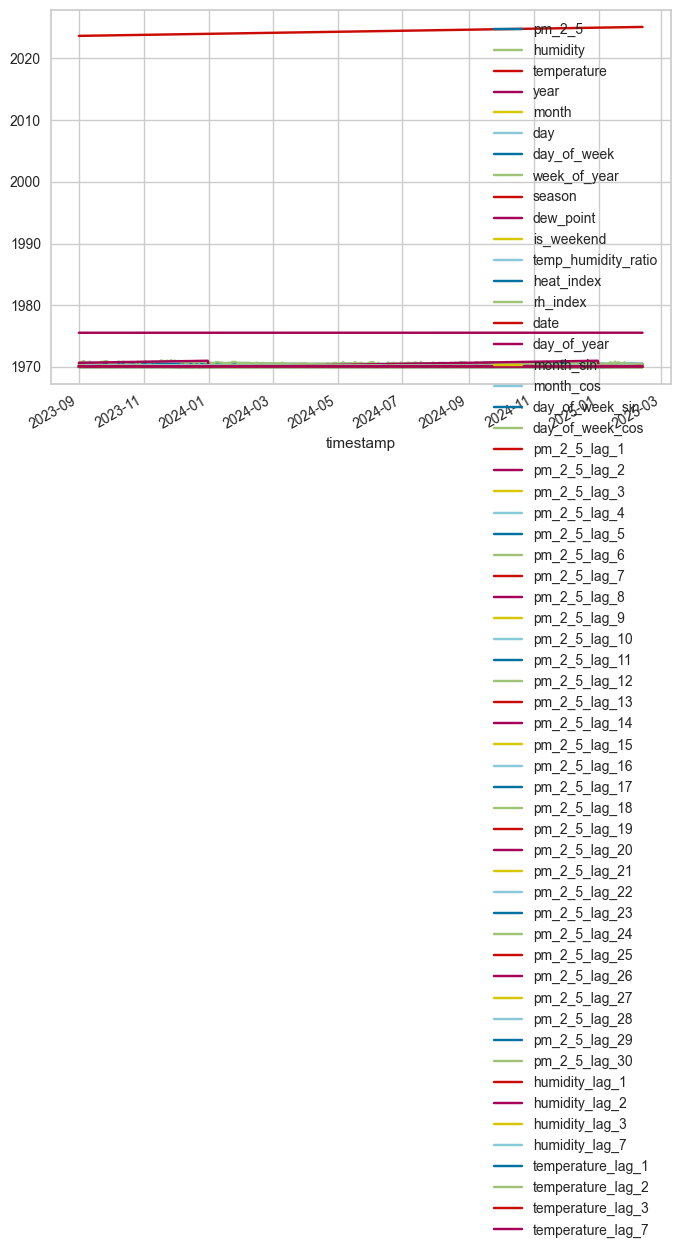

In [115]:
data_filtered.plot()

In [116]:
# ‡∏™‡∏°‡∏°‡∏ï‡∏¥‡∏ß‡πà‡∏≤ data ‡∏°‡∏µ‡∏à‡∏≥‡∏ô‡∏ß‡∏ô‡∏ß‡∏±‡∏ô‡∏ó‡∏±‡πâ‡∏á‡∏´‡∏°‡∏î
total_data = len(data_filtered)

# ‡∏à‡∏≥‡∏ô‡∏ß‡∏ô‡∏ß‡∏±‡∏ô‡∏ó‡∏µ‡πà‡∏ï‡πâ‡∏≠‡∏á‡∏Å‡∏≤‡∏£‡πÄ‡∏õ‡πá‡∏ô test data
test_days = 7

# ‡∏Ñ‡∏≥‡∏ô‡∏ß‡∏ì‡∏™‡∏±‡∏î‡∏™‡πà‡∏ß‡∏ô‡∏Ç‡∏≠‡∏á 30 ‡∏ß‡∏±‡∏ô‡πÉ‡∏ô‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡∏ó‡∏±‡πâ‡∏á‡∏´‡∏°‡∏î
test_size = test_days / total_data
test_size

0.013207547169811321

In [117]:
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(data_filtered, test_size=test_size, shuffle=False)

In [118]:
train_data.shape

(523, 58)

In [119]:
test_data.shape

(7, 58)

In [120]:
test_data.head(1)

pm_2_5   humidity  temperature  year  month  day  \
timestamp                                                                  
2025-02-05 07:00:00  13.987089  71.500943     28.32745  2025      2    5   

                     day_of_week  week_of_year  season  dew_point  ...  \
timestamp                                                          ...   
2025-02-05 07:00:00            2             6       0  22.627639  ...   

                     pm_2_5_lag_29  pm_2_5_lag_30  humidity_lag_1  \
timestamp                                                           
2025-02-05 07:00:00      36.539568      13.047897       70.266522   

                     humidity_lag_2 humidity_lag_3  humidity_lag_7  \
timestamp                                                            
2025-02-05 07:00:00       65.114261      70.341639       75.608102   

                     temperature_lag_1  temperature_lag_2  temperature_lag_3  \
timestamp                                                                      
2025-02-05 07:00:00          27.775432          28.644544           27.68389   

                     temperature_lag_7  
timestamp                               
2025-02-05 07:00:00          27.242726  

[1 rows x 58 columns]

In [121]:
test_data.tail(1)

pm_2_5   humidity  temperature  year  month  day  \
timestamp                                                                  
2025-02-11 07:00:00  27.522727  68.159624    28.693799  2025      2   11   

                     day_of_week  week_of_year  season  dew_point  ...  \
timestamp                                                          ...   
2025-02-11 07:00:00            1             7       0  22.325724  ...   

                     pm_2_5_lag_29  pm_2_5_lag_30  humidity_lag_1  \
timestamp                                                           
2025-02-11 07:00:00      42.594631       34.02521       71.226336   

                     humidity_lag_2 humidity_lag_3  humidity_lag_7  \
timestamp                                                            
2025-02-11 07:00:00       69.916384      69.348548       70.266522   

                     temperature_lag_1  temperature_lag_2  temperature_lag_3  \
timestamp                                                                      
2025-02-11 07:00:00          28.251201          28.373742          28.385596   

                     temperature_lag_7  
timestamp                               
2025-02-11 07:00:00          27.775432  

[1 rows x 58 columns]

In [122]:
test_data.tail()

pm_2_5   humidity  temperature  year  month  day  \
timestamp                                                                  
2025-02-07 07:00:00  29.321219  70.933952    28.271927  2025      2    7   
2025-02-08 07:00:00  26.000000  69.348548    28.385596  2025      2    8   
2025-02-09 07:00:00  24.616898  69.916384    28.373742  2025      2    9   
2025-02-10 07:00:00  25.856981  71.226336    28.251201  2025      2   10   
2025-02-11 07:00:00  27.522727  68.159624    28.693799  2025      2   11   

                     day_of_week  week_of_year  season  dew_point  ...  \
timestamp                                                          ...   
2025-02-07 07:00:00            4             6       0  22.458717  ...   
2025-02-08 07:00:00            5             6       0  22.255305  ...   
2025-02-09 07:00:00            6             6       0  22.357019  ...   
2025-02-10 07:00:00            0             7       0  22.496468  ...   
2025-02-11 07:00:00            1             7       0  22.325724  ...   

                     pm_2_5_lag_29  pm_2_5_lag_30  humidity_lag_1  \
timestamp                                                           
2025-02-07 07:00:00      33.810780      35.536756       69.511783   
2025-02-08 07:00:00      37.291228      33.810780       70.933952   
2025-02-09 07:00:00      40.511737      37.291228       69.348548   
2025-02-10 07:00:00      34.025210      40.511737       69.916384   
2025-02-11 07:00:00      42.594631      34.025210       71.226336   

                     humidity_lag_2 humidity_lag_3  humidity_lag_7  \
timestamp                                                            
2025-02-07 07:00:00       71.500943      70.266522       68.520368   
2025-02-08 07:00:00       69.511783      71.500943       69.231031   
2025-02-09 07:00:00       70.933952      69.511783       70.341639   
2025-02-10 07:00:00       69.348548      70.933952       65.114261   
2025-02-11 07:00:00       69.916384      69.348548       70.266522   

                     temperature_lag_1  temperature_lag_2  temperature_lag_3  \
timestamp                                                                      
2025-02-07 07:00:00          28.579177          28.327450          27.775432   
2025-02-08 07:00:00          28.271927          28.579177          28.327450   
2025-02-09 07:00:00          28.385596          28.271927          28.579177   
2025-02-10 07:00:00          28.373742          28.385596          28.271927   
2025-02-11 07:00:00          28.251201          28.373742          28.385596   

                     temperature_lag_7  
timestamp                               
2025-02-07 07:00:00          27.336718  
2025-02-08 07:00:00          27.315410  
2025-02-09 07:00:00          27.683890  
2025-02-10 07:00:00          28.644544  
2025-02-11 07:00:00          27.775432  

[5 rows x 58 columns]

In [123]:
test_data.columns

Index(['pm_2_5', 'humidity', 'temperature', 'year', 'month', 'day',
       'day_of_week', 'week_of_year', 'season', 'dew_point', 'is_weekend',
       'temp_humidity_ratio', 'heat_index', 'rh_index', 'date', 'day_of_year',
       'month_sin', 'month_cos', 'day_of_week_sin', 'day_of_week_cos',
       'pm_2_5_lag_1', 'pm_2_5_lag_2', 'pm_2_5_lag_3', 'pm_2_5_lag_4',
       'pm_2_5_lag_5', 'pm_2_5_lag_6', 'pm_2_5_lag_7', 'pm_2_5_lag_8',
       'pm_2_5_lag_9', 'pm_2_5_lag_10', 'pm_2_5_lag_11', 'pm_2_5_lag_12',
       'pm_2_5_lag_13', 'pm_2_5_lag_14', 'pm_2_5_lag_15', 'pm_2_5_lag_16',
       'pm_2_5_lag_17', 'pm_2_5_lag_18', 'pm_2_5_lag_19', 'pm_2_5_lag_20',
       'pm_2_5_lag_21', 'pm_2_5_lag_22', 'pm_2_5_lag_23', 'pm_2_5_lag_24',
       'pm_2_5_lag_25', 'pm_2_5_lag_26', 'pm_2_5_lag_27', 'pm_2_5_lag_28',
       'pm_2_5_lag_29', 'pm_2_5_lag_30', 'humidity_lag_1', 'humidity_lag_2',
       'humidity_lag_3', 'humidity_lag_7', 'temperature_lag_1',
       'temperature_lag_2', 'temperature_lag_3', '

In [124]:
# train_data.dropna()

In [125]:
# from pycaret.time_series import *
from pycaret.regression import RegressionExperiment
exp1 = RegressionExperiment()
exp1.setup(data=train_data, target='pm_2_5', session_id=123, fold=12, iterative_imputation_iters=100, remove_outliers = True)
# iterative_imputation_iters=100, remove_outliers = True

In [126]:
# compare baseline models
best = exp1.compare_models(n_select=15)

In [127]:
# model_1 = exp1.create_model('rf')
model_1 = exp1.create_model('gbr')

In [128]:
# exp1.evaluate_model(model_1)

In [129]:
exp1.evaluate_model(model_1)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin‚Ä¶

In [130]:
new_data = test_data.copy().drop(['pm_2_5'], axis=1)
predictions = exp1.predict_model(model_1, data=new_data)
predictions.head()

humidity  temperature  year  month  day  day_of_week  \
timestamp                                                                    
2025-02-05 07:00:00  71.500946    28.327450  2025      2    5            2   
2025-02-06 07:00:00  69.511780    28.579176  2025      2    6            3   
2025-02-07 07:00:00  70.933952    28.271927  2025      2    7            4   
2025-02-08 07:00:00  69.348549    28.385595  2025      2    8            5   
2025-02-09 07:00:00  69.916382    28.373743  2025      2    9            6   

                     week_of_year  season  dew_point  is_weekend  ...  \
timestamp                                                         ...   
2025-02-05 07:00:00             6       0  22.627638           0  ...   
2025-02-06 07:00:00             6       0  22.481533           0  ...   
2025-02-07 07:00:00             6       0  22.458717           0  ...   
2025-02-08 07:00:00             6       0  22.255306           1  ...   
2025-02-09 07:00:00             6       0  22.357019           1  ...   

                     pm_2_5_lag_30  humidity_lag_1  humidity_lag_2  \
timestamp                                                            
2025-02-05 07:00:00      13.047897       70.266525       65.114258   
2025-02-06 07:00:00      36.539570       71.500946       70.266525   
2025-02-07 07:00:00      35.536755       69.511780       71.500946   
2025-02-08 07:00:00      33.810780       70.933952       69.511780   
2025-02-09 07:00:00      37.291229       69.348549       70.933952   

                    humidity_lag_3  humidity_lag_7  temperature_lag_1  \
timestamp                                                               
2025-02-05 07:00:00      70.341637       75.608101          27.775433   
2025-02-06 07:00:00      65.114258       71.167671          28.327450   
2025-02-07 07:00:00      70.266525       68.520370          28.579176   
2025-02-08 07:00:00      71.500946       69.231033          28.271927   
2025-02-09 07:00:00      69.511780       70.341637          28.385595   

                     temperature_lag_2  temperature_lag_3  temperature_lag_7  \
timestamp                                                                      
2025-02-05 07:00:00          28.644545          27.683891          27.242725   
2025-02-06 07:00:00          27.775433          28.644545          27.512932   
2025-02-07 07:00:00          28.327450          27.775433          27.336718   
2025-02-08 07:00:00          28.579176          28.327450          27.315409   
2025-02-09 07:00:00          28.271927          28.579176          27.683891   

                     prediction_label  
timestamp                              
2025-02-05 07:00:00         25.709341  
2025-02-06 07:00:00         18.888876  
2025-02-07 07:00:00         22.160682  
2025-02-08 07:00:00         26.448081  
2025-02-09 07:00:00         25.823019  

[5 rows x 58 columns]

In [131]:
predict_v = predictions['prediction_label']
predict_v.head()

timestamp
2025-02-05 07:00:00    25.709341
2025-02-06 07:00:00    18.888876
2025-02-07 07:00:00    22.160682
2025-02-08 07:00:00    26.448081
2025-02-09 07:00:00    25.823019
Freq: D, Name: prediction_label, dtype: float64

In [132]:
real = test_data['pm_2_5']
# real.head(7)

# ‡∏ó‡∏≥‡∏ô‡∏≤‡∏¢ 1 ‡∏ß‡∏±‡∏ô‡∏Ç‡πâ‡∏≤‡∏á‡∏´‡∏ô‡πâ‡∏≤ ‡∏ï‡πâ‡∏≠‡∏á‡∏ó‡∏≥‡∏ô‡∏≤‡∏¢‡πÄ‡∏ú‡∏∑‡πà‡∏≠ 2 ‡∏ß‡∏±‡∏ô

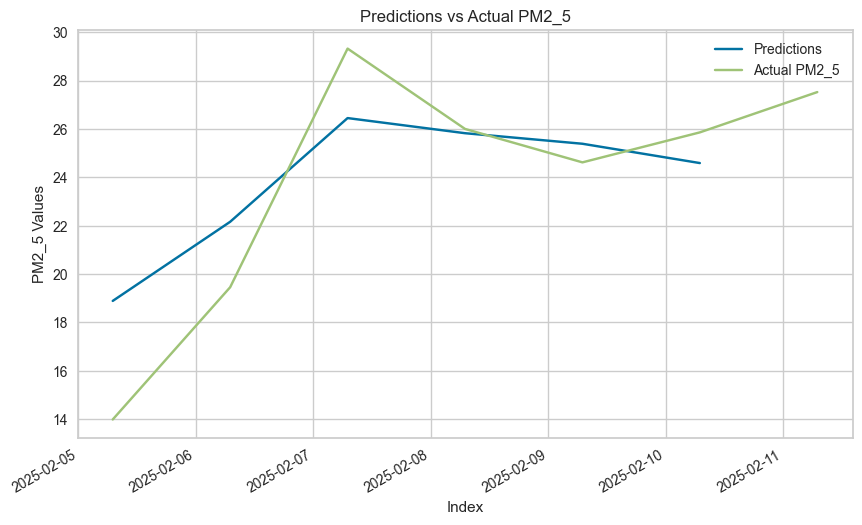

In [133]:
import pandas as pd
import matplotlib.pyplot as plt

# ‡∏™‡∏°‡∏°‡∏∏‡∏ï‡∏¥‡∏ß‡πà‡∏≤ result ‡∏Ñ‡∏∑‡∏≠ DataFrame ‡∏ó‡∏µ‡πà‡∏£‡∏ß‡∏° predictions ‡∏Å‡∏±‡∏ö pm_10
result = pd.concat([predict_v.shift(-1), test_data['pm_2_5']], axis=1)
result.columns = ['Predictions', 'Actual PM2_5']  # ‡∏ï‡∏±‡πâ‡∏á‡∏ä‡∏∑‡πà‡∏≠‡∏Ñ‡∏≠‡∏•‡∏±‡∏°‡∏ô‡πå

# ‡∏û‡∏•‡πá‡∏≠‡∏ï‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•
result.plot(figsize=(10, 6))

# ‡∏ï‡∏±‡πâ‡∏á‡∏ä‡∏∑‡πà‡∏≠‡∏Å‡∏£‡∏≤‡∏ü
plt.title('Predictions vs Actual PM2_5')
plt.xlabel('Index')
plt.ylabel('PM2_5 Values')

# ‡πÅ‡∏™‡∏î‡∏á‡∏Å‡∏£‡∏≤‡∏ü
plt.show()

In [134]:
from pycaret.regression import *
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

y_true = test_data["pm_2_5"][:"2025-2-10"]
y_pred = predict_v.shift(-1).dropna(axis=0)# "prediction_label" contains predictions

# Calculate Regression Metrics
r2 = r2_score(y_true, y_pred)
mae = mean_absolute_error(y_true, y_pred)
rmse = np.sqrt(mean_squared_error(y_true, y_pred))

# Calculate Accuracy as (1 - (MAE / mean_actual)) * 100
mean_actual = np.mean(y_true)  # Mean of actual values
accuracy = (1 - (mae / mean_actual)) * 100  # Accuracy in percentage

# Print Results
print(f"R¬≤ Score: {r2:.4f}")  # Closer to 1 is better
print(f"Mean Absolute Error (MAE): {mae:.4f}")  # Lower is better
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")  # Lower is better
print(f"Accuracy: {accuracy:.2f}%")  # Accuracy percentage

R¬≤ Score: 0.7271
Mean Absolute Error (MAE): 2.1160
Root Mean Squared Error (RMSE): 2.6406
Accuracy: 90.88%


In [135]:
from pycaret.regression import *
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

# Extract actual values and predicted values
y_true = test_data["pm_2_5"][:"2025-2-10"]
y_pred = predict_v.shift(-1).dropna(axis=0)

# Calculate Regression Metrics
r2 = r2_score(y_true, y_pred)
mae = mean_absolute_error(y_true, y_pred)
rmse = np.sqrt(mean_squared_error(y_true, y_pred))

# Calculate MAPE and Accuracy
mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100  # Mean Absolute Percentage Error
accuracy = 100 - mape  # Convert to Accuracy %

# Print Results
print(f"R¬≤ Score: {r2:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
print(f"Accuracy: {accuracy:.2f}%")

R¬≤ Score: 0.7271
Mean Absolute Error (MAE): 2.1160
Root Mean Squared Error (RMSE): 2.6406
Mean Absolute Percentage Error (MAPE): 11.24%
Accuracy: 88.76%


# Predict 1 by 1

30 ‡∏ß‡∏±‡∏ô  
2025-01-13 07:00:00  
2025-02-11 07:00:00  
7 ‡∏ß‡∏±‡∏ô  
2025-02-05  
2025-02-11  
24 ‡∏ß‡∏±‡∏ô  
2025-01-19 07:00:00  
31 ‡∏ß‡∏±‡∏ô
2025-01-12 07:00:00

In [136]:
model_1

GradientBoostingRegressor(random_state=123)

In [137]:
# exp1.save_model(model_1, "pm2_5_model_1")

In [157]:
model_1 = exp1.create_model('dt')

In [166]:
exp1.save_model(model_1, 'dt_model_eng')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('date_feature_extractor',
                  TransformerWrapper(include=['date'],
                                     transformer=ExtractDateTimeFeatures())),
                 ('numerical_imputer',
                  TransformerWrapper(include=['humidity', 'temperature', 'year',
                                              'month', 'day', 'day_of_week',
                                              'week_of_year', 'season',
                                              'dew_point', 'is_weekend',
                                              'temp_humidity_ratio',
                                              'heat_index', 'rh_index'...
                                              'pm_2_5_lag_8', 'pm_2_5_lag_9',
                                              'pm_2_5_lag_10', 'pm_2_5_lag_11',
                                              'pm_2_5_lag_12', ...],
                                     transformer=SimpleImputer())),
   

In [158]:
data_compare = data_filtered.loc[:'2025-01-12']
result = pd.DataFrame()

start_date = "2025-01-13"
end_date = "2025-02-11"

model = model_1

for date in pd.date_range(start=start_date, end=end_date, freq="D"):
    # Drop columns
    test_1 = data_filtered
    # ‡∏î‡∏∂‡∏á‡∏ß‡∏±‡∏ô‡∏ô‡∏µ‡πâ‡∏°‡∏≤
    test_1 = test_1.loc[str(date.date())]

    # ‡πÉ‡∏™‡πà‡πÄ‡∏Ç‡πâ‡∏≤‡πÑ‡∏õ
    data_compare = pd.concat([data_compare, test_1], axis=0)

    # ‡πÄ‡∏û‡∏¥‡πà‡∏°‡∏ü‡∏µ‡πÄ‡∏à‡∏≠‡∏£‡πå rolling average (‡∏Ñ‡πà‡∏≤‡πÄ‡∏â‡∏•‡∏µ‡πà‡∏¢‡πÄ‡∏Ñ‡∏•‡∏∑‡πà‡∏≠‡∏ô‡∏ó‡∏µ‡πà)

    # data_compare['pm_2_5_rolling_7'] = data_compare['pm_2_5'].rolling(window=7).mean().shift(1)  # ‡∏Ñ‡πà‡∏≤‡πÄ‡∏â‡∏•‡∏µ‡πà‡∏¢ 5 ‡∏ß‡∏±‡∏ô‡∏Ç‡∏≠‡∏á PM 10

    # rolling_size = 1
    # for i in range(1,rolling_size+1):
    #     data_compare[f'pm_2_5_rolling_{i}'] = data_compare['pm_2_5'].rolling(window=i).mean().shift(1)

    for i in range(1,lag_size+1):
        data_compare[f'pm_2_5_lag_{i}'] = data_compare['pm_2_5'].shift(i)

    # ‡∏î‡∏∂‡∏á
    test_1 = (data_compare.loc[str(date.date())]).drop(columns=['pm_2_5'])
    
    # Drop ‡∏ó‡∏¥‡πâ‡∏á‡∏•‡πà‡∏≤‡∏™‡∏∏‡∏î‡πÉ‡∏ô data_compare
    data_compare = data_compare.drop(data_compare.last_valid_index())
    test_1 = test_1[~test_1.index.duplicated(keep='last')]

    # Predict
    predict_test_1 = exp1.predict_model(model, data=test_1)

    # ‡πÄ‡∏û‡∏¥‡πà‡∏°‡∏ú‡∏•‡∏ó‡∏≥‡∏ô‡∏≤‡∏¢‡πÄ‡∏Ç‡πâ‡∏≤‡πÑ‡∏õ‡πÉ‡∏ô data_compare
    data_compare = pd.concat([data_compare, predict_test_1], axis=0)

    # ‡πÅ‡∏ó‡∏ô‡∏ó‡∏µ‡πà‡∏Ñ‡πà‡∏≤‡πÉ‡∏ô‡∏Ñ‡∏≠‡∏•‡∏±‡∏°‡∏ô‡πå 'pm_2_5' ‡πÉ‡∏ô‡∏ß‡∏±‡∏ô‡∏ó‡∏µ‡πà '2025-01-13' ‡∏î‡πâ‡∏ß‡∏¢‡∏Ñ‡πà‡∏≤‡πÉ‡∏ô‡∏Ñ‡∏≠‡∏•‡∏±‡∏°‡∏ô‡πå 'prediction_label'
    data_compare.loc[str(date.date()), 'pm_2_5'] = data_compare.loc[str(date.date()), 'prediction_label']

    # ‡∏•‡∏ö‡∏Ñ‡∏≠‡∏•‡∏±‡∏°‡∏ô‡πå 'prediction_label' (‡∏´‡∏≤‡∏Å‡∏ï‡πâ‡∏≠‡∏á‡∏Å‡∏≤‡∏£‡πÅ‡∏Ñ‡πà‡∏ú‡∏•‡∏ó‡∏≥‡∏ô‡∏≤‡∏¢)
    data_compare = data_compare.drop(columns=['prediction_label'])

    # ‡∏Å‡∏£‡∏≠‡∏á‡πÄ‡∏≠‡∏≤‡∏ß‡∏±‡∏ô‡∏ó‡∏µ‡πà‡∏ã‡πâ‡∏≥‡∏Å‡∏±‡∏ô (index ‡∏ã‡πâ‡∏≥) ‡∏≠‡∏≠‡∏Å‡πÉ‡∏´‡πâ‡πÄ‡∏´‡∏•‡∏∑‡∏≠‡πÅ‡∏Ñ‡πà‡∏ï‡∏±‡∏ß‡πÄ‡∏î‡∏µ‡∏¢‡∏ß
    data_compare = data_compare[~data_compare.index.duplicated(keep='last')]

    # ‡∏ö‡∏±‡∏ô‡∏ó‡∏∂‡∏Å‡∏•‡∏á result
    result = pd.concat([result, predict_test_1], axis=0)

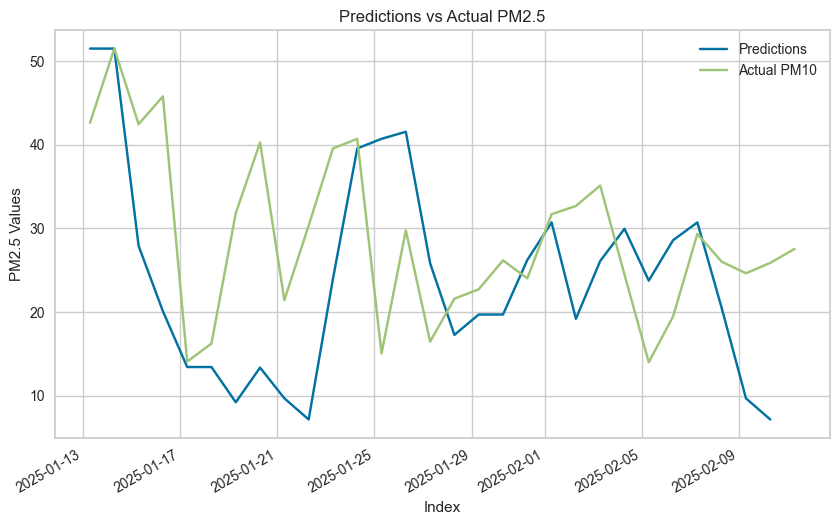

In [159]:
import pandas as pd
import matplotlib.pyplot as plt

real_data = data_filtered.loc[start_date:end_date]
# ‡∏™‡∏°‡∏°‡∏∏‡∏ï‡∏¥‡∏ß‡πà‡∏≤ result ‡∏Ñ‡∏∑‡∏≠ DataFrame ‡∏ó‡∏µ‡πà‡∏£‡∏ß‡∏° predictions ‡∏Å‡∏±‡∏ö pm_10
result_plot = pd.concat([result['prediction_label'].shift(-1), real_data['pm_2_5']], axis=1)
result_plot.columns = ['Predictions', 'Actual PM10']  # ‡∏ï‡∏±‡πâ‡∏á‡∏ä‡∏∑‡πà‡∏≠‡∏Ñ‡∏≠‡∏•‡∏±‡∏°‡∏ô‡πå

# ‡∏û‡∏•‡πá‡∏≠‡∏ï‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•
result_plot.plot(figsize=(10, 6))

# ‡∏ï‡∏±‡πâ‡∏á‡∏ä‡∏∑‡πà‡∏≠‡∏Å‡∏£‡∏≤‡∏ü
plt.title('Predictions vs Actual PM2.5')
plt.xlabel('Index')
plt.ylabel('PM2.5 Values')

# ‡πÅ‡∏™‡∏î‡∏á‡∏Å‡∏£‡∏≤‡∏ü
plt.show()

In [160]:
y_true_30 = real_data["pm_2_5"][:"2025-2-10"]
y_pred_30 = result['prediction_label'].shift(-1).dropna(axis=0)# "prediction_label" contains predictions

In [161]:
# Calculate Regression Metrics
r2 = r2_score(y_true_30, y_pred_30)
mae = mean_absolute_error(y_true_30, y_pred_30)
rmse = np.sqrt(mean_squared_error(y_true_30, y_pred_30))

# Calculate MAPE and Accuracy
mape = np.mean(np.abs((y_true_30 - y_pred_30) / y_true_30)) * 100  # Mean Absolute Percentage Error
accuracy = 100 - mape  # Convert to Accuracy %

# Print Results
print(f"R¬≤ Score: {r2:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
print(f"Accuracy: {accuracy:.2f}%")

R¬≤ Score: -0.7803
Mean Absolute Error (MAE): 10.5099
Root Mean Squared Error (RMSE): 13.3200
Mean Absolute Percentage Error (MAPE): 39.54%
Accuracy: 60.46%


In [162]:
y_true_7 = real_data["pm_2_5"][:"2025-1-19"]
y_pred_7 = (result['prediction_label'].shift(-1).dropna(axis=0))[:'2025-1-19']# "prediction_label" contains predictions

In [163]:
y_true_7.shape

(7,)

In [164]:
# Calculate Regression Metrics
r2 = r2_score(y_true_7, y_pred_7)
mae = mean_absolute_error(y_true_7, y_pred_7)
rmse = np.sqrt(mean_squared_error(y_true_7, y_pred_7))

# Calculate MAPE and Accuracy
mape = np.mean(np.abs((y_true_7 - y_pred_7) / y_true_7)) * 100  # Mean Absolute Percentage Error
accuracy = 100 - mape  # Convert to Accuracy %

# Print Results
print(f"R¬≤ Score: {r2:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
print(f"Accuracy: {accuracy:.2f}%")

R¬≤ Score: -0.1283
Mean Absolute Error (MAE): 10.7309
Root Mean Squared Error (RMSE): 14.4783
Mean Absolute Percentage Error (MAPE): 29.16%
Accuracy: 70.84%


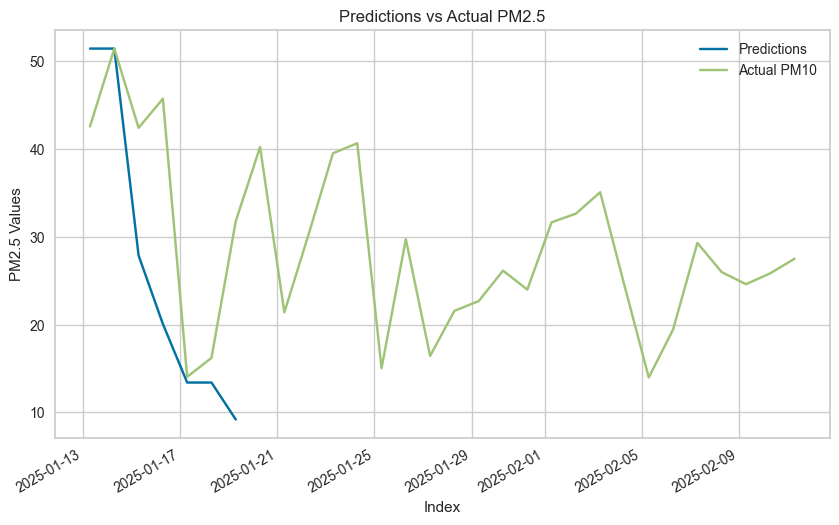

In [165]:
import pandas as pd
import matplotlib.pyplot as plt

real_data = data_filtered.loc[start_date:end_date]
# ‡∏™‡∏°‡∏°‡∏∏‡∏ï‡∏¥‡∏ß‡πà‡∏≤ result ‡∏Ñ‡∏∑‡∏≠ DataFrame ‡∏ó‡∏µ‡πà‡∏£‡∏ß‡∏° predictions ‡∏Å‡∏±‡∏ö pm_10
result_plot = pd.concat([((result['prediction_label'].shift(-1))[:'2025-1-19']), real_data['pm_2_5']], axis=1)
result_plot.columns = ['Predictions', 'Actual PM10']  # ‡∏ï‡∏±‡πâ‡∏á‡∏ä‡∏∑‡πà‡∏≠‡∏Ñ‡∏≠‡∏•‡∏±‡∏°‡∏ô‡πå

# ‡∏û‡∏•‡πá‡∏≠‡∏ï‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•
result_plot.plot(figsize=(10, 6))

# ‡∏ï‡∏±‡πâ‡∏á‡∏ä‡∏∑‡πà‡∏≠‡∏Å‡∏£‡∏≤‡∏ü
plt.title('Predictions vs Actual PM2.5')
plt.xlabel('Index')
plt.ylabel('PM2.5 Values')

# ‡πÅ‡∏™‡∏î‡∏á‡∏Å‡∏£‡∏≤‡∏ü
plt.show()

Processing model: AdaBoostRegressor


Processing model: ExtraTreesRegressor


Processing model: LGBMRegressor


Processing model: OrthogonalMatchingPursuit


Processing model: RandomForestRegressor


Processing model: LassoLars


Processing model: BayesianRidge


Processing model: GradientBoostingRegressor


Processing model: Lasso


Processing model: ElasticNet


Processing model: HuberRegressor


Processing model: KNeighborsRegressor


Processing model: DecisionTreeRegressor


Processing model: DummyRegressor


Processing model: PassiveAggressiveRegressor


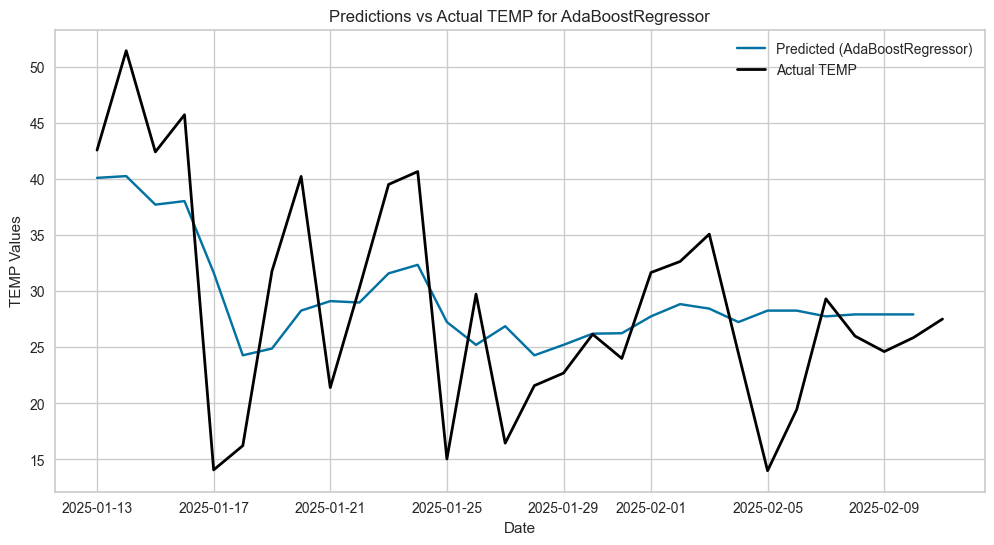

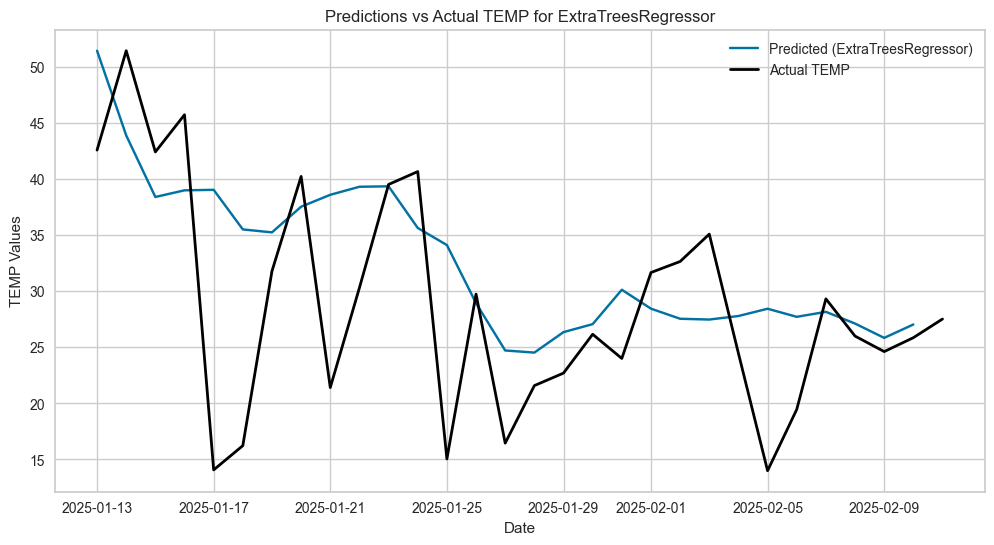

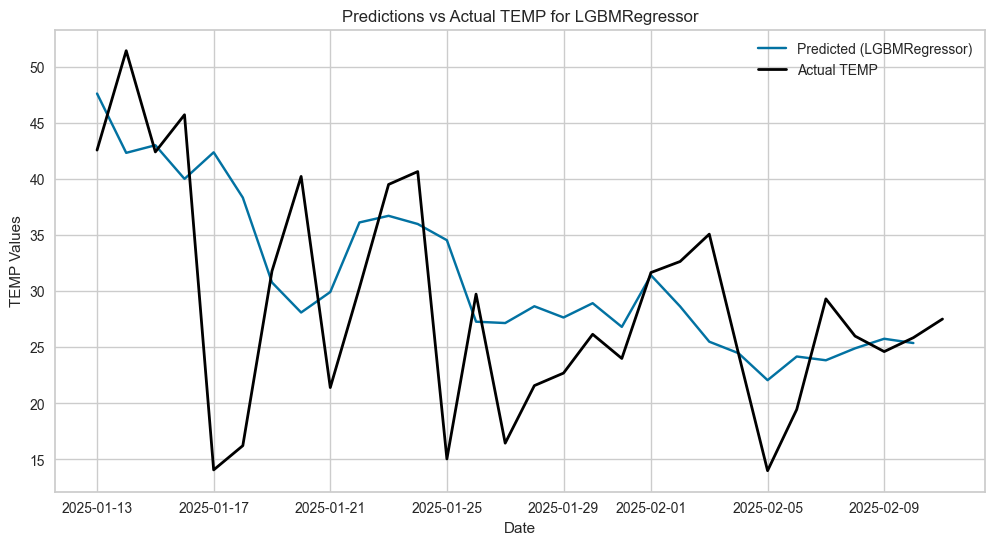

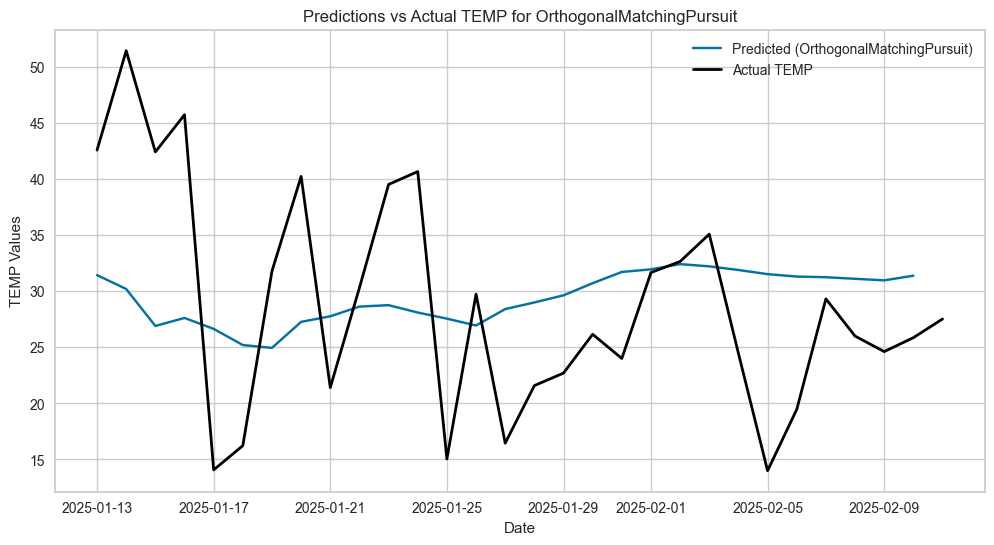

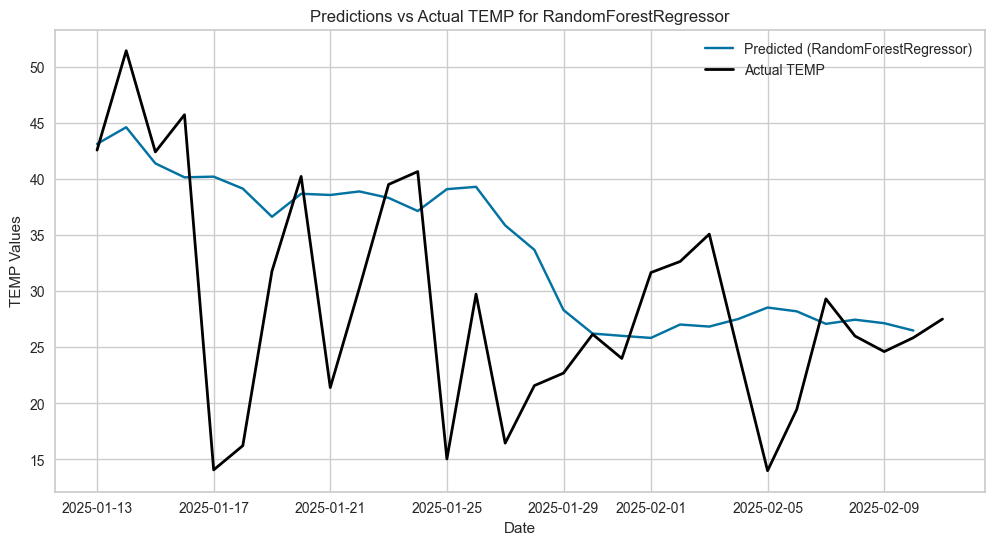

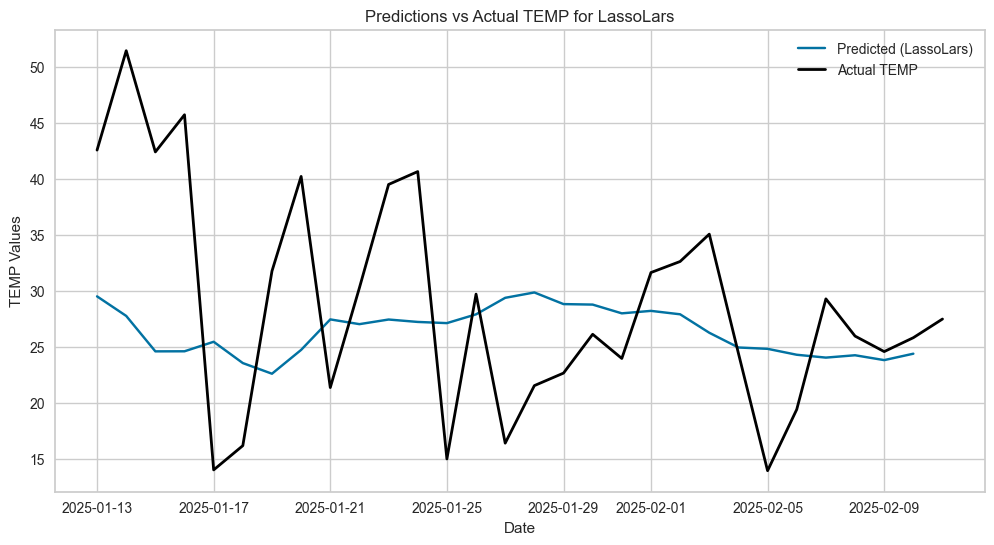

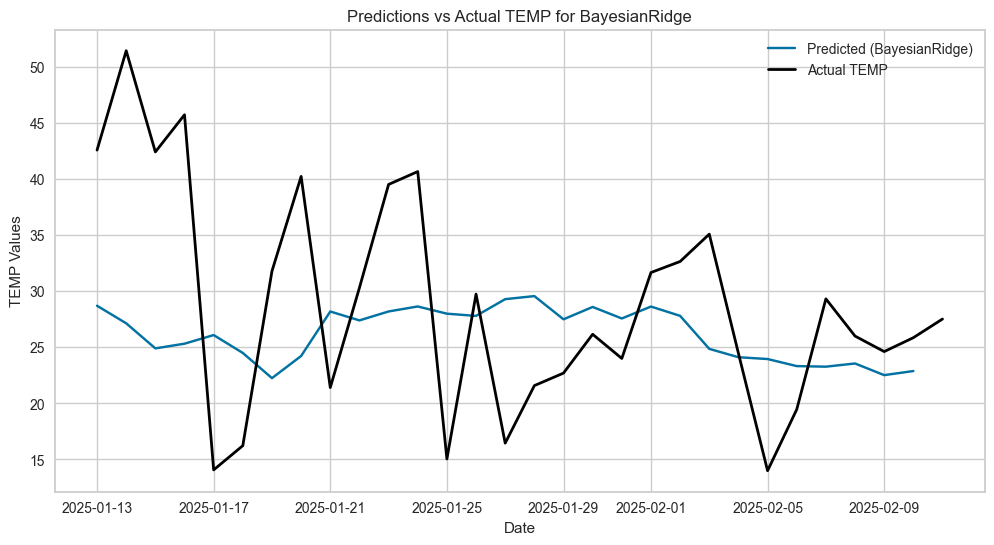

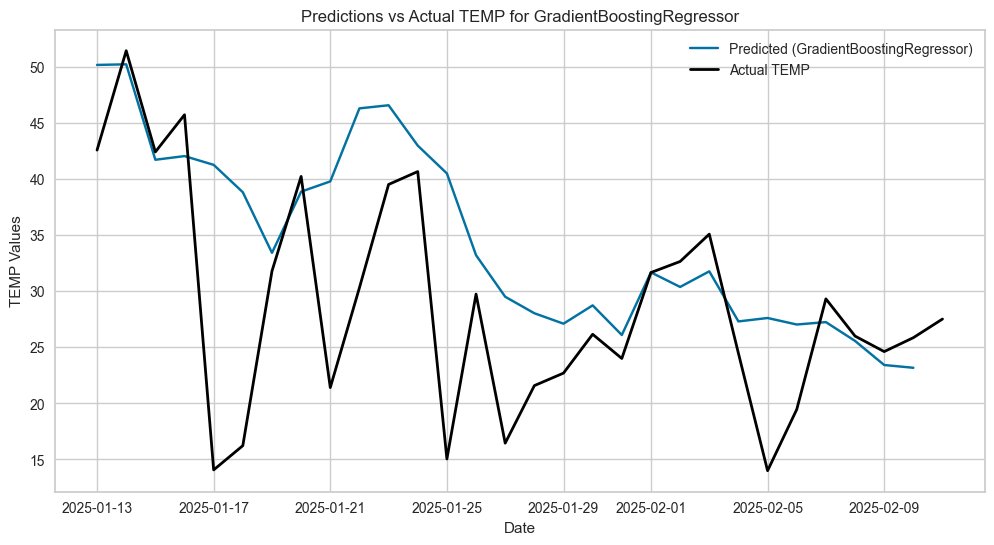

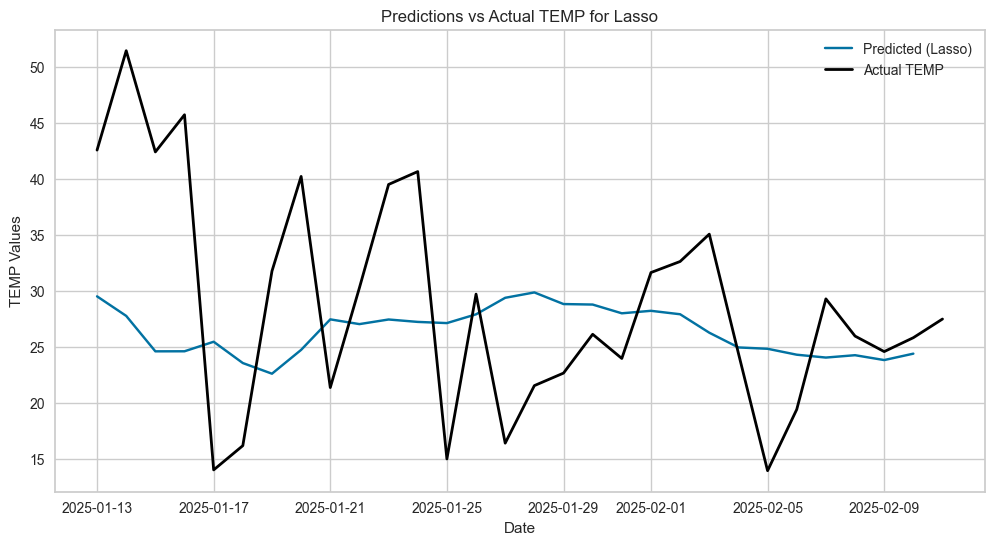

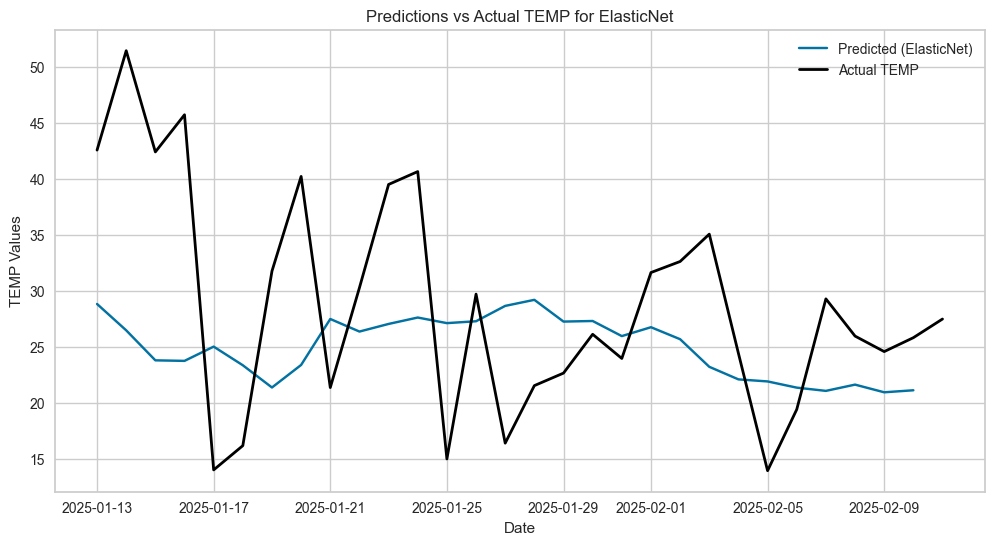

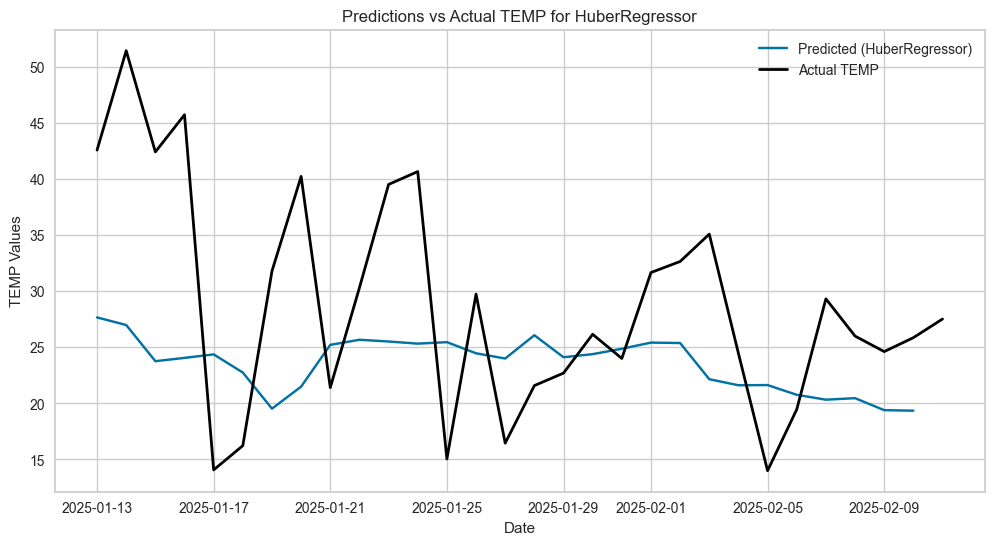

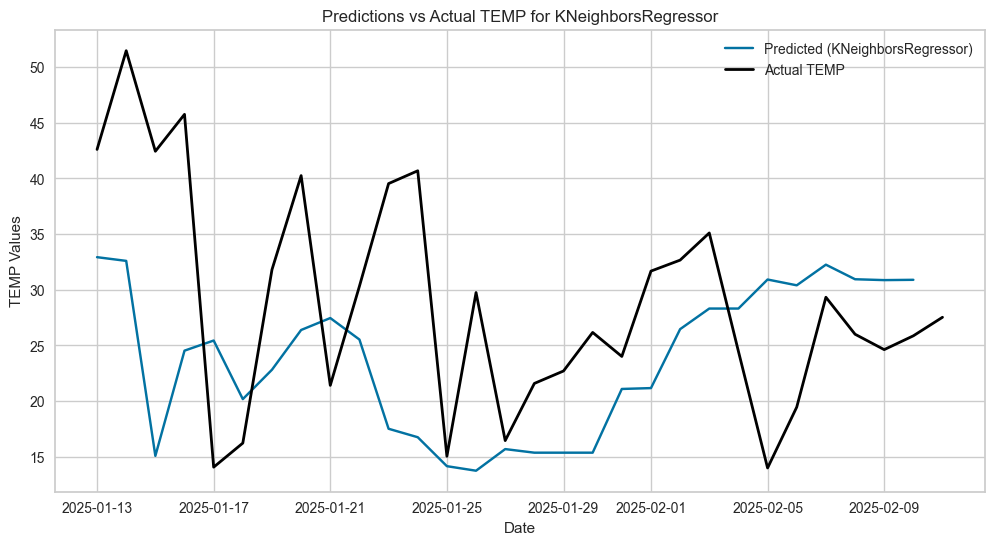

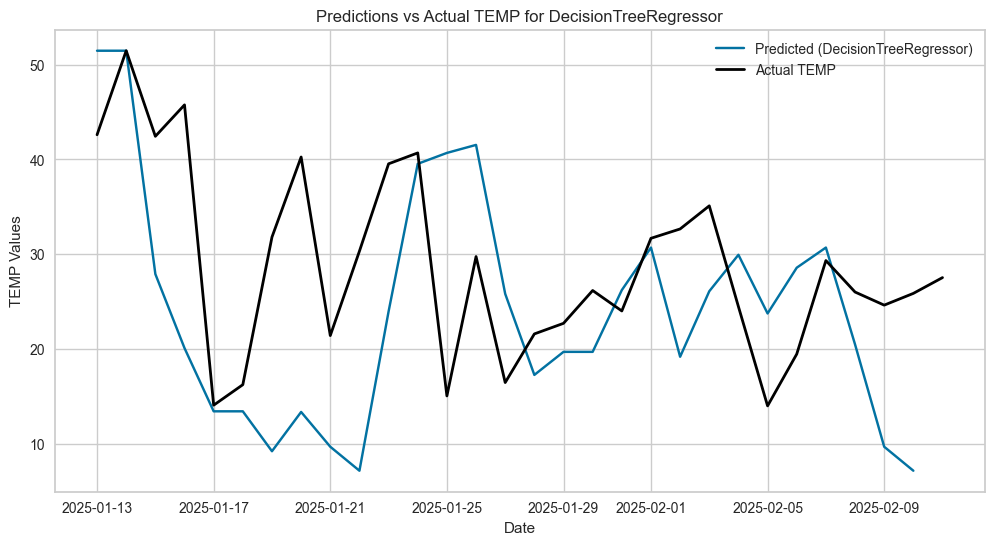

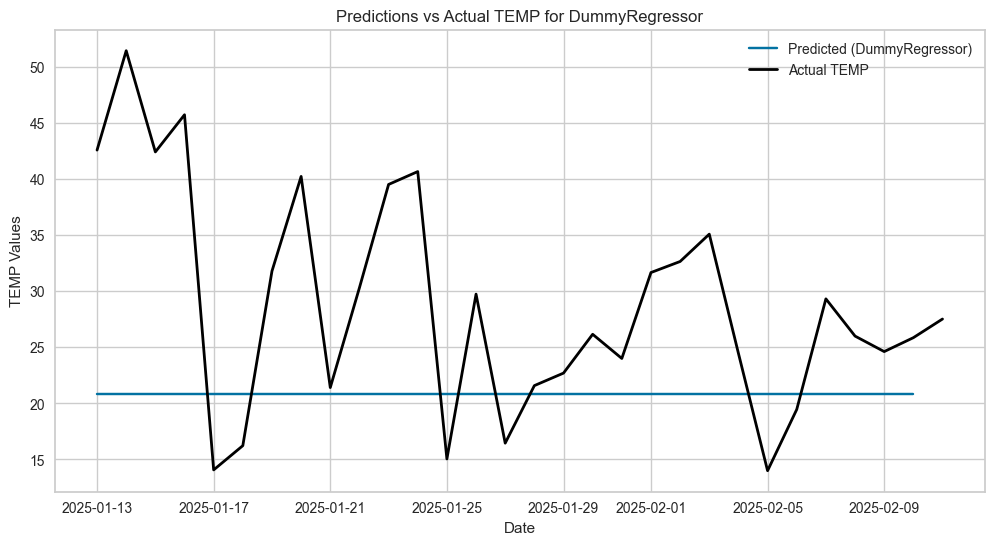

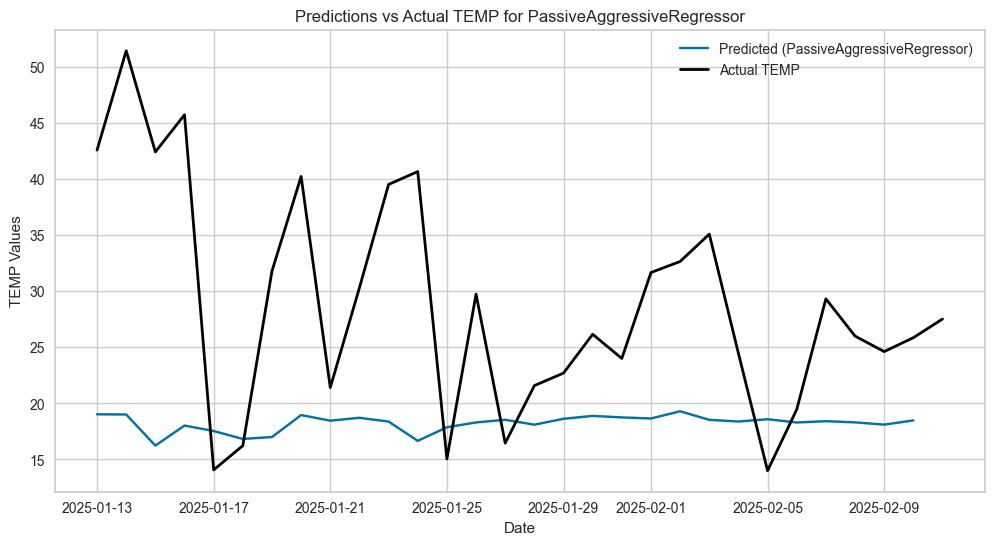

In [146]:
import pandas as pd
import matplotlib.pyplot as plt

# ‡πÅ‡∏õ‡∏•‡∏á index ‡πÄ‡∏õ‡πá‡∏ô datetime ‡πÅ‡∏•‡∏∞‡∏•‡∏ö‡πÄ‡∏ß‡∏•‡∏≤‡∏≠‡∏≠‡∏Å
x = data_filtered.copy()
x.index = pd.to_datetime(x.index).normalize()

# ‡πÄ‡∏Å‡πá‡∏ö‡∏ú‡∏•‡∏•‡∏±‡∏û‡∏ò‡πå‡∏Ç‡∏≠‡∏á‡πÅ‡∏ï‡πà‡∏•‡∏∞‡πÇ‡∏°‡πÄ‡∏î‡∏•
result_dict = {}

# ‡∏£‡∏≤‡∏¢‡∏ä‡∏∑‡πà‡∏≠‡πÇ‡∏°‡πÄ‡∏î‡∏•‡∏ó‡∏±‡πâ‡∏á‡∏´‡∏°‡∏î‡∏à‡∏≤‡∏Å best_list
model_names = {model.__class__.__name__: model for model in best}

start_date = "2025-01-13"
end_date = "2025-02-11"

# ‡∏ß‡∏ô‡∏•‡∏π‡∏õ‡∏ú‡πà‡∏≤‡∏ô‡∏ó‡∏∏‡∏Å‡πÇ‡∏°‡πÄ‡∏î‡∏•
for model_name, model in model_names.items():
    print(f"Processing model: {model_name}")

    data_compare = x.loc[:'2025-01-12'].copy()  # ‡πÉ‡∏ä‡πâ copy() ‡∏õ‡πâ‡∏≠‡∏á‡∏Å‡∏±‡∏ô Warning
    result = pd.DataFrame()

    for date in pd.date_range(start=start_date, end=end_date, freq="D"):
        # ‡∏•‡∏ö‡πÄ‡∏ß‡∏•‡∏≤‡∏≠‡∏≠‡∏Å‡∏à‡∏≤‡∏Å‡∏ß‡∏±‡∏ô‡∏ó‡∏µ‡πà
        date = pd.to_datetime(date).normalize()  # ‡∏•‡∏ö‡πÄ‡∏ß‡∏•‡∏≤‡∏≠‡∏≠‡∏Å‡∏à‡∏≤‡∏Å‡∏ï‡∏±‡∏ß‡πÅ‡∏õ‡∏£ date

        # ‡∏ï‡∏£‡∏ß‡∏à‡∏™‡∏≠‡∏ö‡∏ß‡πà‡∏≤‡πÉ‡∏ô x ‡∏°‡∏µ‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡πÉ‡∏ô‡∏ß‡∏±‡∏ô‡∏ó‡∏µ‡πà‡∏ô‡∏µ‡πâ‡∏´‡∏£‡∏∑‡∏≠‡πÑ‡∏°‡πà
        if date not in x.index:
            print(f"‚ö†Ô∏è Warning: Date {date} not found in x index.")
            continue

        # ‡∏î‡∏∂‡∏á‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡∏Ç‡∏≠‡∏á‡∏ß‡∏±‡∏ô‡∏ó‡∏µ‡πà‡∏ï‡πâ‡∏≠‡∏á‡∏Å‡∏≤‡∏£
        test_1 = x.loc[[date]].copy()

        # ‡πÉ‡∏™‡πà‡πÄ‡∏Ç‡πâ‡∏≤‡πÑ‡∏õ
        data_compare = pd.concat([data_compare, test_1], axis=0)

        # ‡πÄ‡∏û‡∏¥‡πà‡∏° lag feature
        for i in range(1, lag_size + 1):
            test_1[f'pm_2_5_lag_{i}'] = data_compare['pm_2_5'].shift(i)

        # ‡∏•‡∏ö‡∏Ñ‡πà‡∏≤ NaN ‡∏ó‡∏µ‡πà‡πÄ‡∏Å‡∏¥‡∏î‡∏à‡∏≤‡∏Å‡∏Å‡∏≤‡∏£ shift
        test_1 = test_1.dropna()

        # ‡∏ó‡∏≥‡∏ô‡∏≤‡∏¢‡∏Ñ‡πà‡∏≤
        predict_test_1 = exp1.predict_model(model, data=test_1)

        # ‡∏≠‡∏±‡∏õ‡πÄ‡∏î‡∏ï data_compare
        predict_test_1.index = [date]  # ‡∏Å‡∏≥‡∏´‡∏ô‡∏î index ‡πÄ‡∏õ‡πá‡∏ô‡∏ß‡∏±‡∏ô‡∏ó‡∏µ‡πà‡∏û‡∏¢‡∏≤‡∏Å‡∏£‡∏ì‡πå
        data_compare.loc[date, 'pm_2_5'] = predict_test_1['prediction_label'].values[0]

        # ‡∏ö‡∏±‡∏ô‡∏ó‡∏∂‡∏Å‡∏ú‡∏•‡∏•‡∏±‡∏û‡∏ò‡πå
        result = pd.concat([result, predict_test_1], axis=0)

    # ‡∏ö‡∏±‡∏ô‡∏ó‡∏∂‡∏Å‡∏ú‡∏•‡∏•‡∏±‡∏û‡∏ò‡πå‡∏Ç‡∏≠‡∏á‡πÇ‡∏°‡πÄ‡∏î‡∏•‡∏ô‡∏µ‡πâ‡∏•‡∏á dict
    result_dict[model_name] = result

# --------------------------------------------
# ‡∏û‡∏•‡πá‡∏≠‡∏ï‡∏Å‡∏£‡∏≤‡∏ü‡πÄ‡∏õ‡∏£‡∏µ‡∏¢‡∏ö‡πÄ‡∏ó‡∏µ‡∏¢‡∏ö‡∏ó‡∏∏‡∏Å‡πÇ‡∏°‡πÄ‡∏î‡∏•
# --------------------------------------------
real_data = x.loc[start_date:end_date]

# ‡∏ß‡∏ô‡∏•‡∏π‡∏õ‡∏û‡∏•‡πá‡∏≠‡∏ï‡∏Å‡∏£‡∏≤‡∏ü‡∏ó‡∏µ‡∏•‡∏∞‡πÇ‡∏°‡πÄ‡∏î‡∏•
for model_name, result in result_dict.items():
    plt.figure(figsize=(12, 6))
    
    result_plot = pd.concat([result['prediction_label'].shift(-1), real_data['pm_2_5']], axis=1)
    result_plot.columns = ['Predictions', 'Actual TEMP']

    plt.plot(result_plot.index, result_plot['Predictions'], label=f"Predicted ({model_name})")
    plt.plot(real_data.index, real_data['pm_2_5'], label="Actual TEMP", color="black", linewidth=2)
    
    # ‡∏ï‡∏±‡πâ‡∏á‡∏Ñ‡πà‡∏≤‡∏Å‡∏£‡∏≤‡∏ü
    plt.title(f'Predictions vs Actual TEMP for {model_name}')
    plt.xlabel('Date')
    plt.ylabel('TEMP Values')
    plt.legend()

    # ‡πÅ‡∏™‡∏î‡∏á‡∏Å‡∏£‡∏≤‡∏ü
    plt.show()

In [ ]:
# y_true = x.loc[start_date:end_date, 'pm_2_5'][:7]  # ‡∏Ñ‡πà‡∏≤‡∏à‡∏£‡∏¥‡∏á
# y_pred = (result['prediction_label'].shift(-1).dropna(axis=0))[:7]  # ‡∏Ñ‡πà‡∏≤‡∏û‡∏¢‡∏≤‡∏Å‡∏£‡∏ì‡πå

In [155]:
# y_pred

2025-01-13    19.020943
2025-01-14    19.005063
2025-01-15    16.228146
2025-01-16    18.017685
2025-01-17    17.530498
2025-01-18    16.822510
2025-01-19    16.995438
Name: prediction_label, dtype: float64

In [156]:
# --------------------------------------------
# ‡∏Ñ‡∏≥‡∏ô‡∏ß‡∏ì‡πÅ‡∏•‡∏∞‡πÅ‡∏™‡∏î‡∏á‡∏ú‡∏• Regression Metrics (‡∏´‡∏•‡∏±‡∏á‡∏à‡∏≤‡∏Å‡∏û‡∏•‡πá‡∏≠‡∏ï‡∏Å‡∏£‡∏≤‡∏ü)
# --------------------------------------------
for model_name, result in result_dict.items():
    y_true = x.loc[start_date:end_date, 'pm_2_5'][:7]  # ‡∏Ñ‡πà‡∏≤‡∏à‡∏£‡∏¥‡∏á
    y_pred = (result['prediction_label'].shift(-1).dropna(axis=0))[:7]  # ‡∏Ñ‡πà‡∏≤‡∏û‡∏¢‡∏≤‡∏Å‡∏£‡∏ì‡πå

    # ‡∏•‡∏ö NaN ‡∏ó‡∏µ‡πà‡πÄ‡∏Å‡∏¥‡∏î‡∏à‡∏≤‡∏Å‡∏Å‡∏≤‡∏£ shift
    valid_idx = y_pred.dropna().index
    y_true = y_true.loc[valid_idx]
    y_pred = y_pred.loc[valid_idx]

    r2 = r2_score(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100  # Mean Absolute Percentage Error
    accuracy = 100 - mape  # ‡πÄ‡∏õ‡∏•‡∏µ‡πà‡∏¢‡∏ô‡πÄ‡∏õ‡πá‡∏ô Accuracy %

    # ‡πÅ‡∏™‡∏î‡∏á‡∏Ñ‡πà‡∏≤ Metrics ‡∏Ç‡∏≠‡∏á‡πÇ‡∏°‡πÄ‡∏î‡∏•‡∏ô‡∏µ‡πâ
    print("\nüìä Model Performance Metrics:")
    print(f"Model: {model_name}")
    print(f"R¬≤ Score: {r2:.4f}")
    print(f"Mean Absolute Error (MAE): {mae:.4f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
    print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
    print(f"Accuracy: {accuracy:.2f}%")
    print("-" * 50)


üìä Model Performance Metrics:
Model: AdaBoostRegressor
R¬≤ Score: 0.5114
Mean Absolute Error (MAE): 8.3787
Root Mean Squared Error (RMSE): 9.5282
Mean Absolute Percentage Error (MAPE): 36.02%
Accuracy: 63.98%
--------------------------------------------------

üìä Model Performance Metrics:
Model: ExtraTreesRegressor
R¬≤ Score: 0.0728
Mean Absolute Error (MAE): 10.7026
Root Mean Squared Error (RMSE): 13.1252
Mean Absolute Percentage Error (MAPE): 52.46%
Accuracy: 47.54%
--------------------------------------------------

üìä Model Performance Metrics:
Model: LGBMRegressor
R¬≤ Score: -0.1036
Mean Absolute Error (MAE): 10.2787
Root Mean Squared Error (RMSE): 14.3190
Mean Absolute Percentage Error (MAPE): 54.94%
Accuracy: 45.06%
--------------------------------------------------

üìä Model Performance Metrics:
Model: OrthogonalMatchingPursuit
R¬≤ Score: -0.1011
Mean Absolute Error (MAE): 13.4972
Root Mean Squared Error (RMSE): 14.3029
Mean Absolute Percentage Error (MAPE): 44.30%
Ac